1) Planteamiento del problema y recopilación de datos

In [1]:
import pandas as pd

total_data = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv")
total_data.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [4]:
total_data.shape
total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
total_data.duplicated().sum()

np.int64(0)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


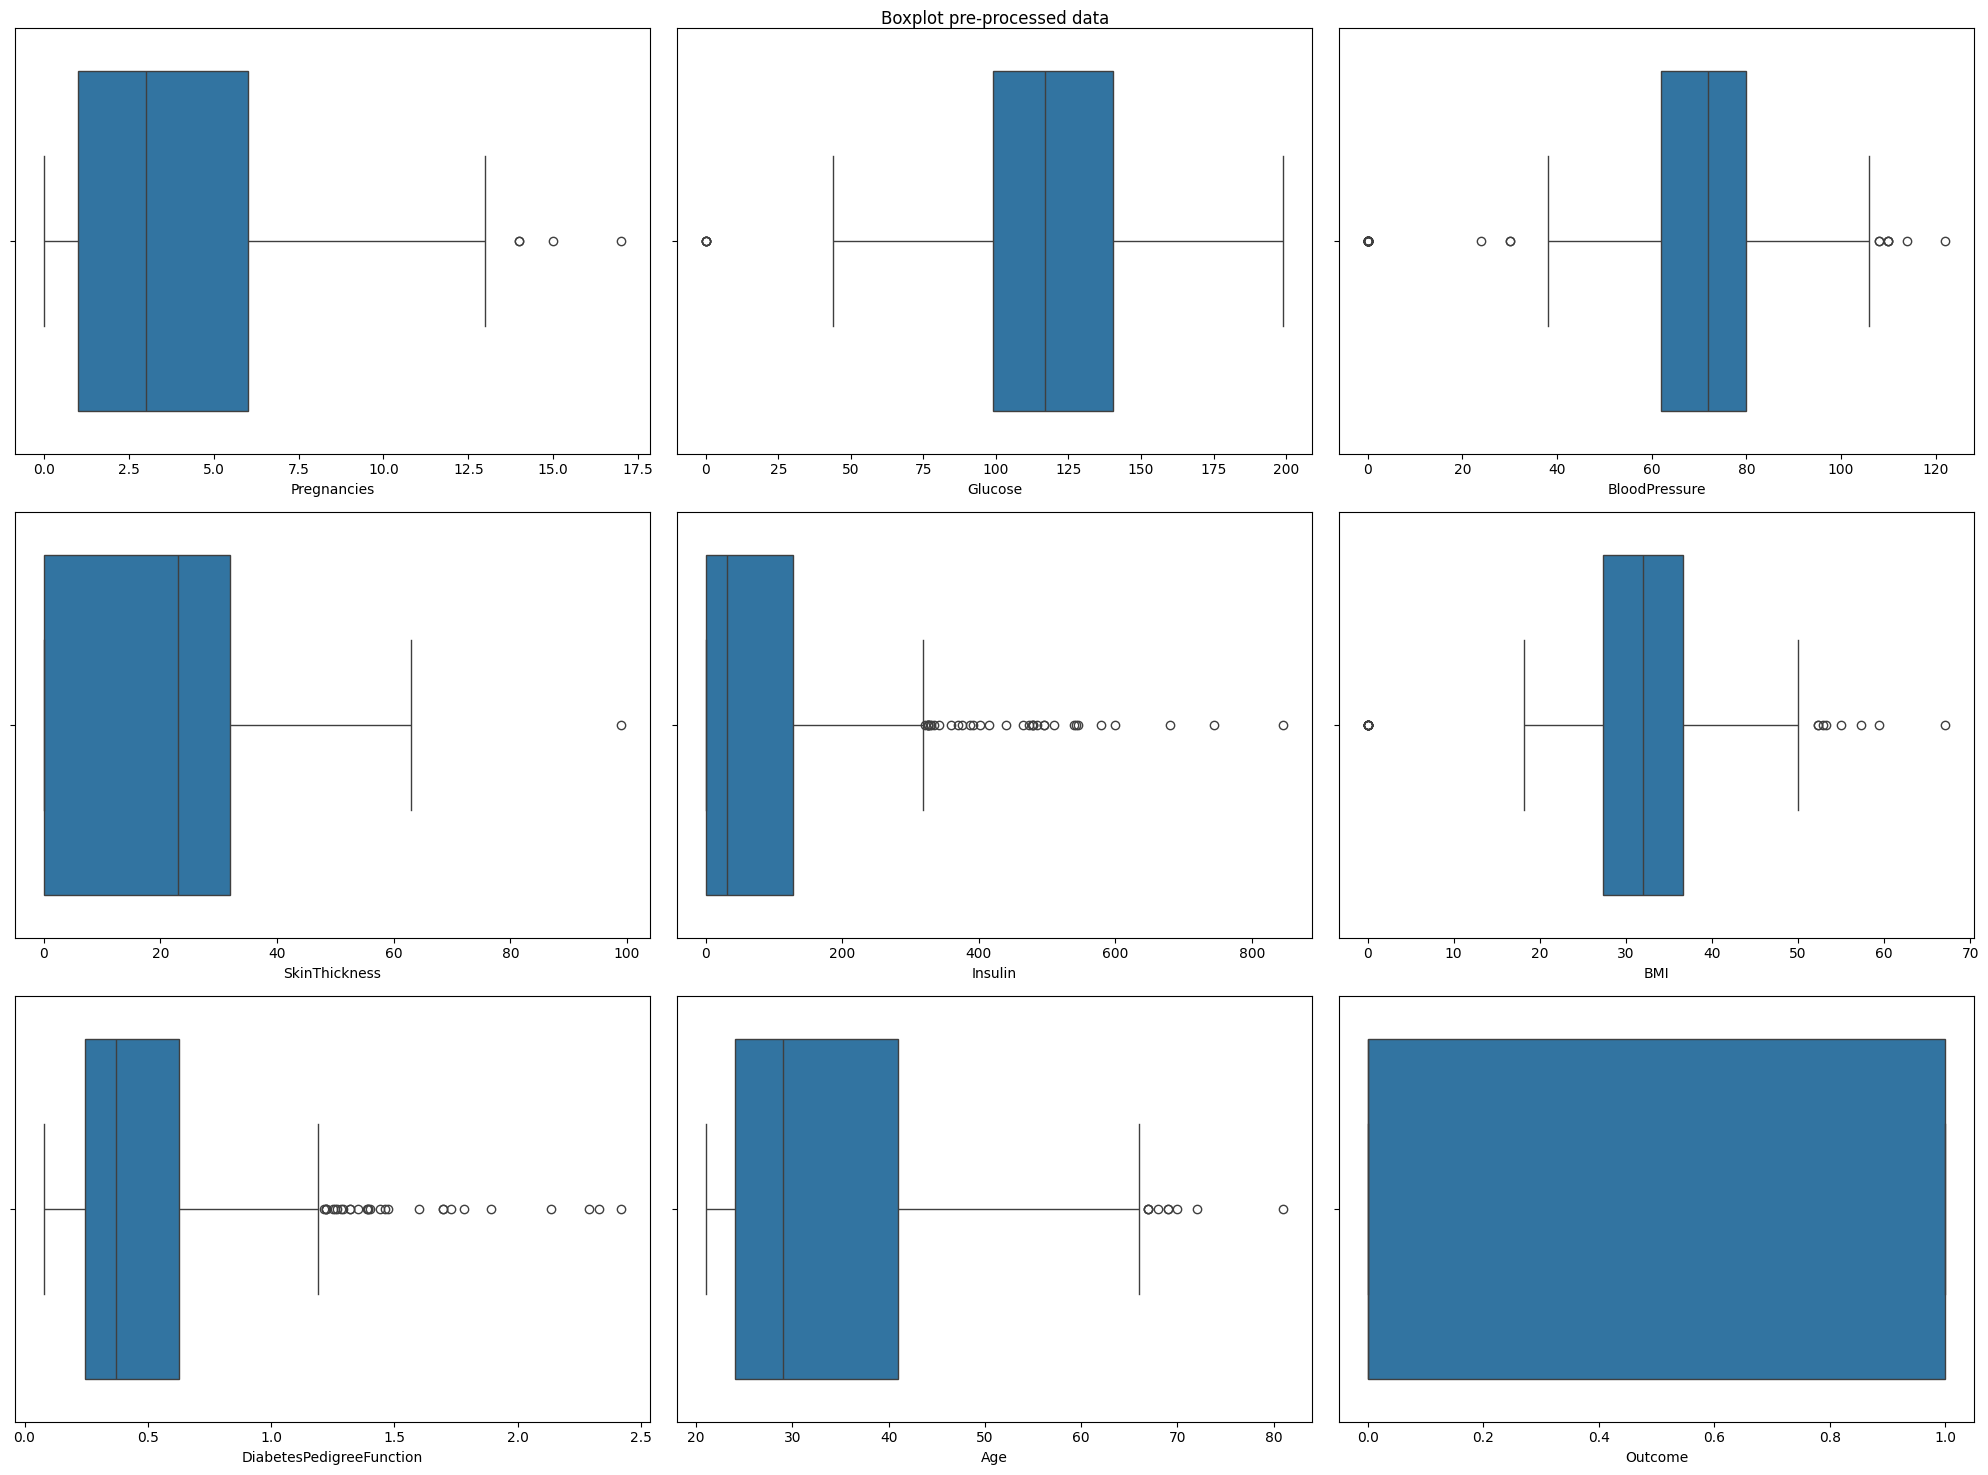

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

# Visualize all column names in dataframe
column_list    = total_data.columns.tolist()
for column_name in column_list:
    print(column_name)

# Get outliers
fig, axis = plt.subplots(3,3,figsize=(20,15))
r = 0
c = 0
for col_idx in np.arange(0,len(column_list)):
    sn.boxplot(ax=axis[r,c], data = total_data, x = total_data.columns[col_idx])
    c += 1
    if c > 2:
        r += 1
        c = 0

plt.suptitle('Boxplot pre-processed data')
plt.tight_layout()
plt.show()

In [15]:
total_data_processed = total_data
total_data_processed = total_data_processed[total_data_processed['Insulin'] <= 400]
total_data_processed = total_data_processed[total_data_processed['DiabetesPedigreeFunction'] <= 1.3]

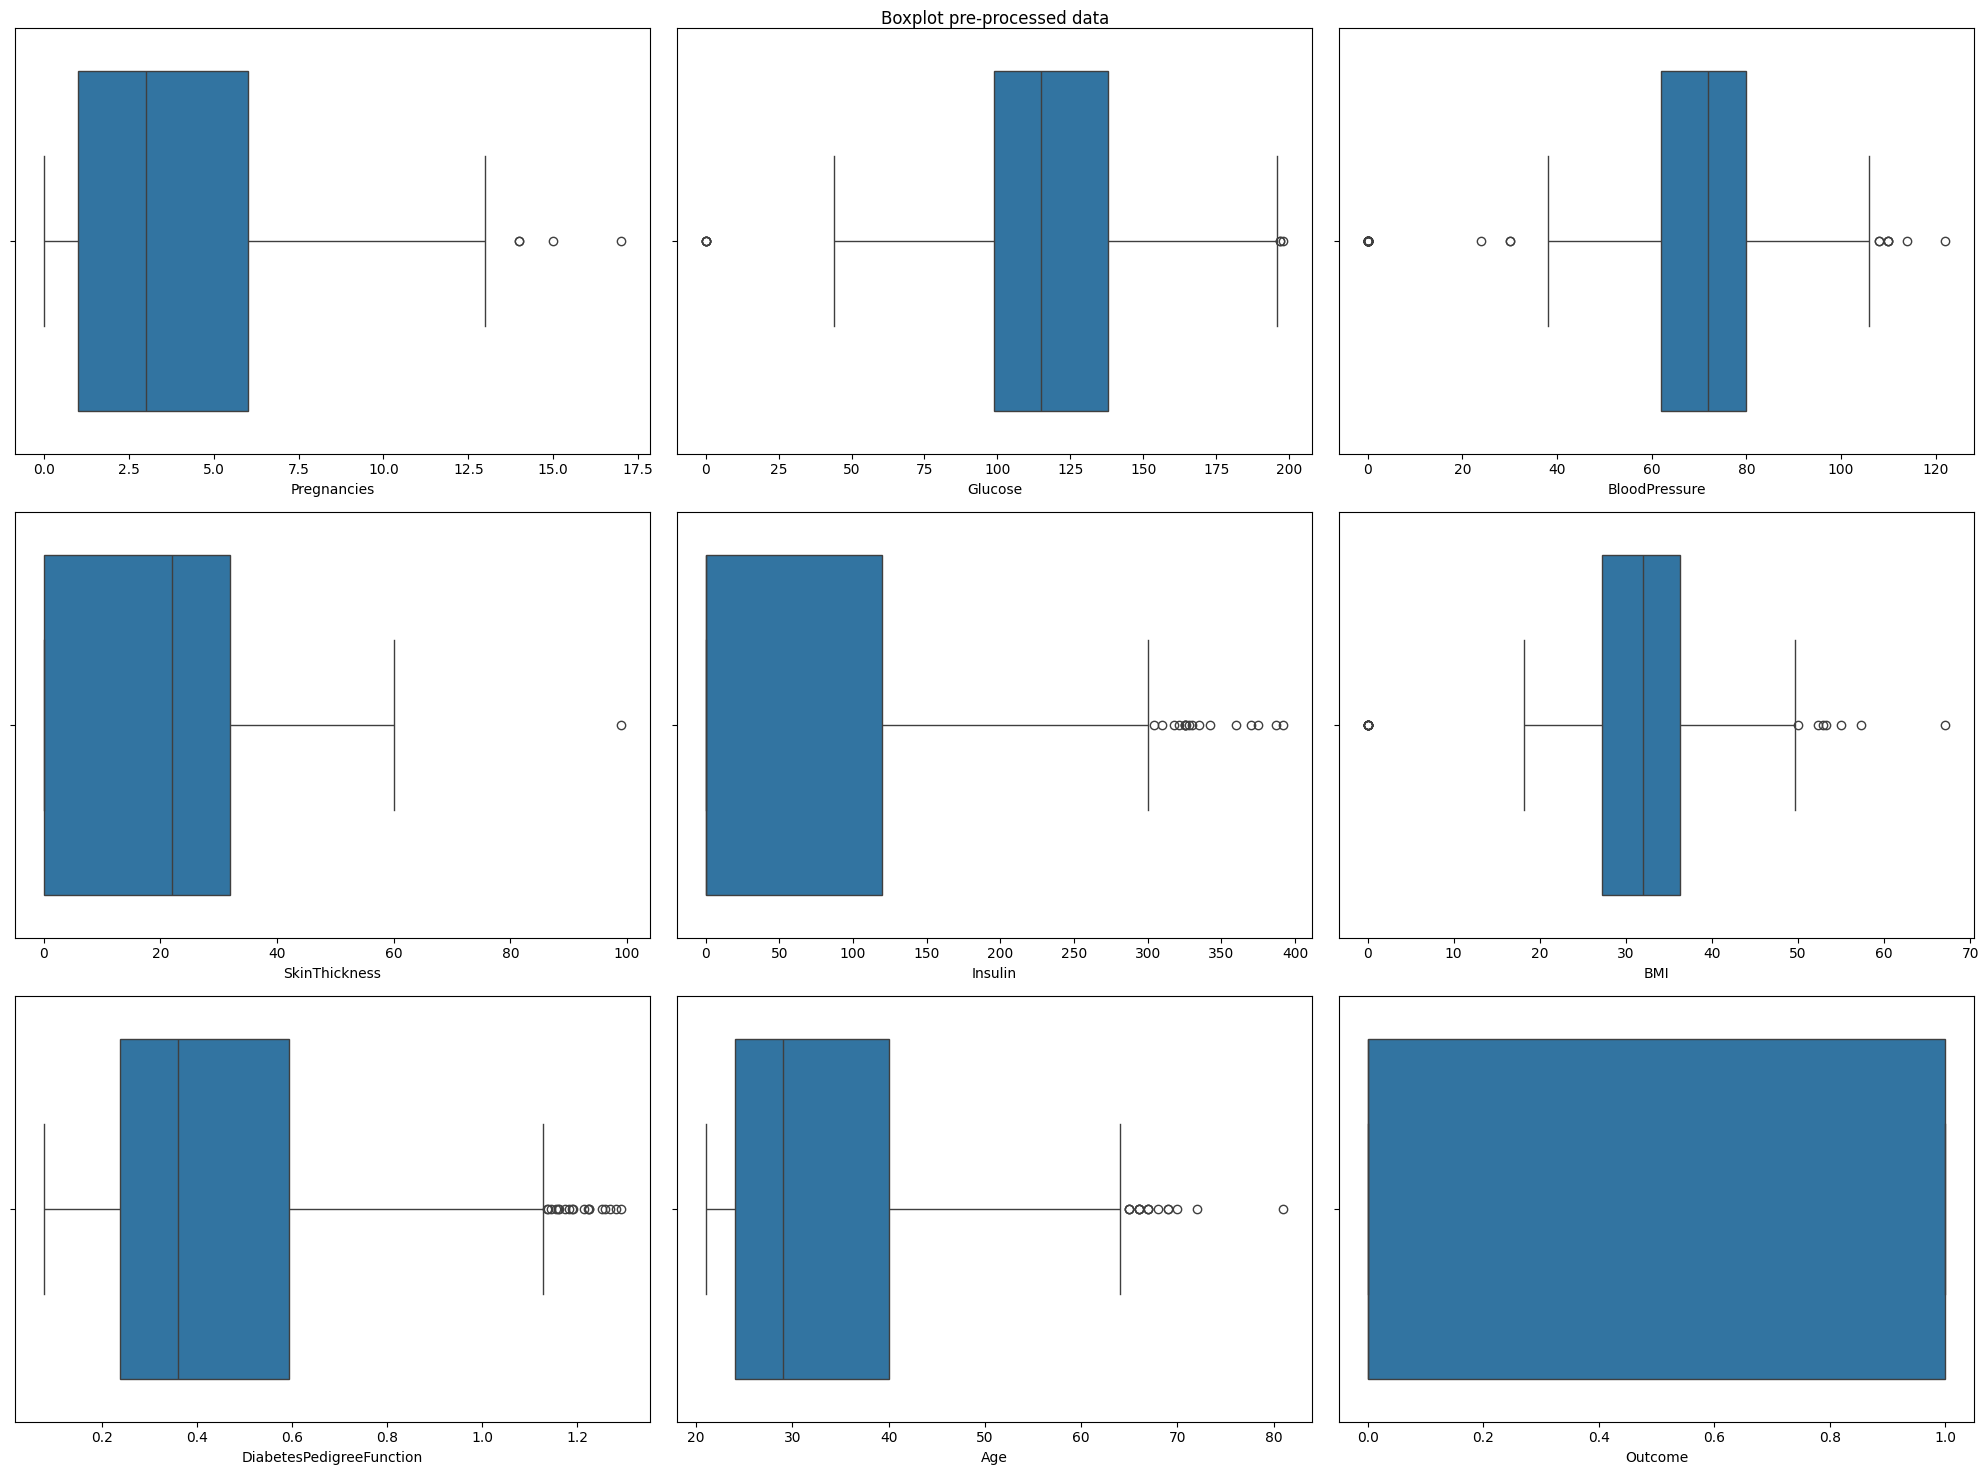

In [16]:
# Get outliers
fig, axis = plt.subplots(3,3,figsize=(20,15))
r = 0
c = 0
for col_idx in np.arange(0,len(column_list)):
    sn.boxplot(ax=axis[r,c], data = total_data_processed, x = total_data_processed.columns[col_idx])
    c += 1
    if c > 2:
        r += 1
        c = 0

plt.suptitle('Boxplot pre-processed data')
plt.tight_layout()
plt.show()

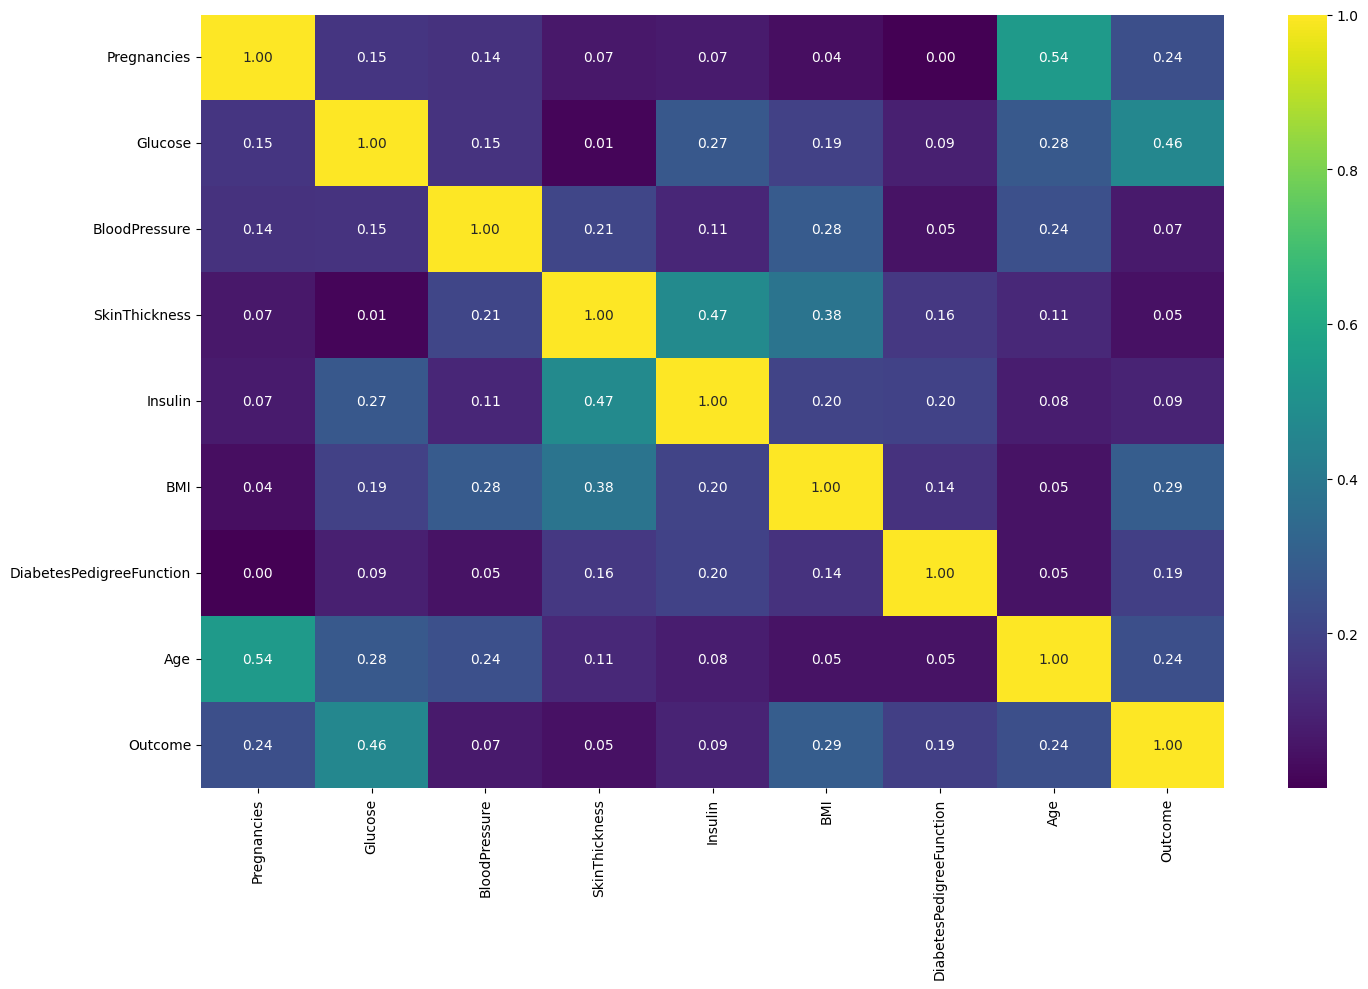

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
sn.heatmap(total_data_processed.corr(method="pearson").abs(), annot=True, fmt=".2f", cmap="viridis", ax=ax)
plt.tight_layout()
plt.show()